In [ ]:
* Online News Popularity Prediction Model *

In [ ]:
Name: Joel Joshi
Organization: Entri Elevate

Date: 02-03-2025

In [ ]:
#  Overview of Problem Statement

In [83]:
The popularity of online news articles, often measured by the number of shares it receives, depends on various factors such as the article’s content, publication timing, and metadata. Predicting whether an article will become popular is a challenging yet valuable task for news publishers aiming to optimize their content strategies and boost reader engagement. This project leverages machine learning to address this problem using a dataset of online news articles.

SyntaxError: invalid character '’' (U+2019) (1016137314.py, line 1)

In [ ]:
# Objective

In [ ]:
The goal of this project is to build an accurate machine learning model to predict whether an online news article will be popular, defined here as achieving a number of shares equal to or exceeding a threshold (e.g., 1400 shares), based on its features.

In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import joblib
from time import time
from scipy.stats import skew

In [5]:
# 1. Data Collection

In [7]:
# Load the dataset
data = pd.read_csv("OnlinePopularity_data.csv")
display(data.head())
print("Dataset shape:", data.shape)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Dataset shape: (39644, 61)


In [51]:
data.info

<bound method DataFrame.info of                                                      url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.

In [53]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
# 2. Data Preprocessing - Data Cleaning

In [11]:
# Check for missing values
print("Total missing values:", data.isnull().sum().sum())  # Should be 0

Total missing values: 0


In [15]:
# 3. Exploratory Data Analysis (EDA)

C:\Users\joelj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


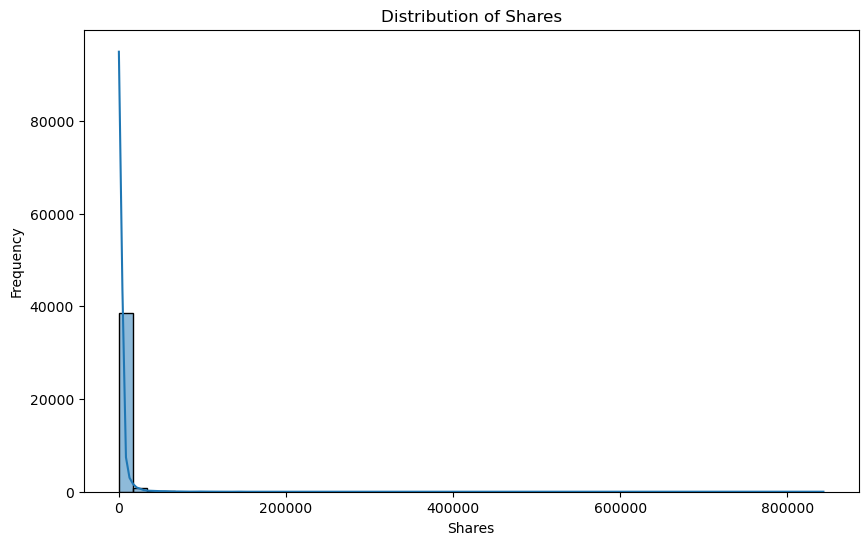

In [19]:
# Distribution of shares
plt.figure(figsize=(10, 6))
sns.histplot(data[' shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

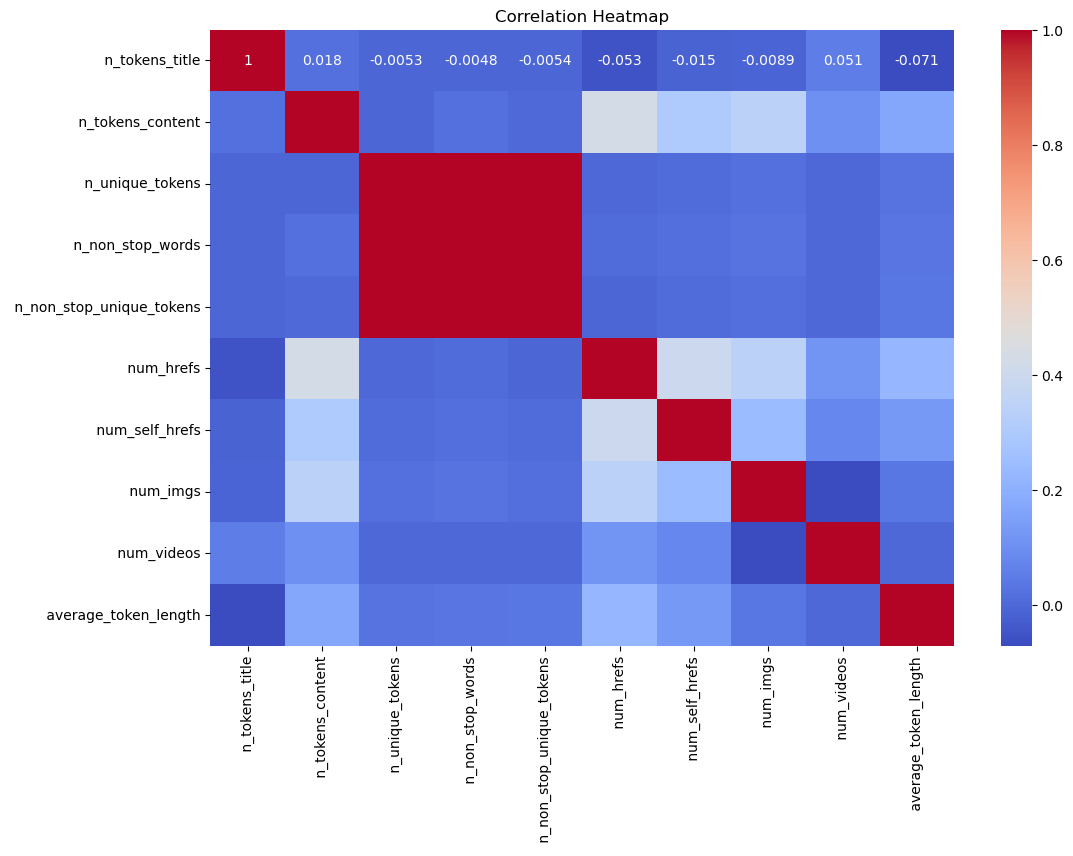

In [21]:
# Correlation heatmap of a subset of features
plt.figure(figsize=(12, 8))
sns.heatmap(data.iloc[:, 2:12].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# 4. Feature Engineering

In [27]:
# Process target variable (popular if shares >= 1400)
popularity_raw = data[' shares']
label_encoder = LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(popularity_raw >= 1400))
print("Class distribution:\n", popular_label.value_counts())

Class distribution:
 1    21154
0    18490
Name: count, dtype: int64


In [29]:
# 5. Feature Selection

In [35]:
# Extract features by dropping non-predictive columns
features_raw = data.drop(['url', ' timedelta', ' shares'], axis=1)
display(features_raw.head())



,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [57]:
# 6. Handle Skewness

In [63]:
# Calculate skewness for each numerical feature
numerical_features = features_raw.select_dtypes(include=[np.number]).columns
skewness = features_raw[numerical_features].apply(skew)
skewed_features = skewness[abs(skewness) > 1].index
print("\nSkewed features (skewness > 1 or < -1):", skewed_features.tolist())


Skewed features (skewness > 1 or < -1): [' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_rate_negative_words', ' rate_positive_words', ' min_positive_polarity', ' max_negative_polarity', ' abs_title_sentiment_polarity']


C:\Users\joelj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


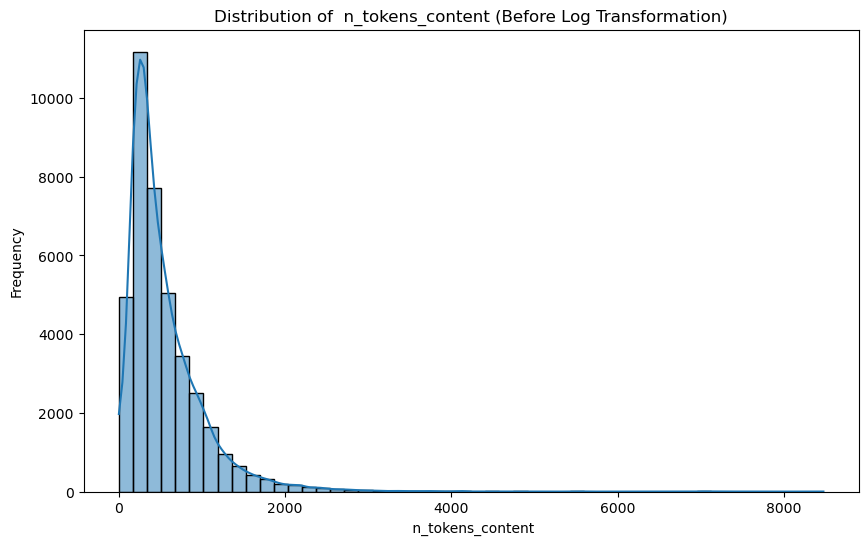

In [65]:
# Visualize a sample skewed feature before transformation
if len(skewed_features) > 0:
    sample_feature = skewed_features[0]
    plt.figure(figsize=(10, 6))
    sns.histplot(features_raw[sample_feature], bins=50, kde=True)
    plt.title(f'Distribution of {sample_feature} (Before Log Transformation)')
    plt.xlabel(sample_feature)
    plt.ylabel('Frequency')
    plt.show()

In [67]:
# Apply log1p transformation to skewed features
for feature in skewed_features:
    features_raw[feature] = np.log1p(features_raw[feature])

C:\Users\joelj\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\joelj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


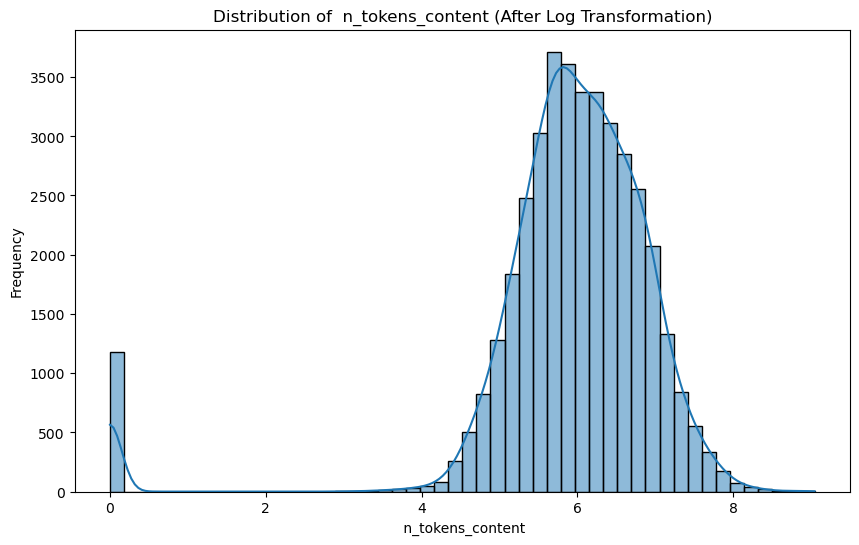

In [69]:
# Visualize the same sample feature after transformation
if len(skewed_features) > 0:
    plt.figure(figsize=(10, 6))
    sns.histplot(features_raw[sample_feature], bins=50, kde=True)
    plt.title(f'Distribution of {sample_feature} (After Log Transformation)')
    plt.xlabel(sample_feature)
    plt.ylabel('Frequency')
    plt.show()

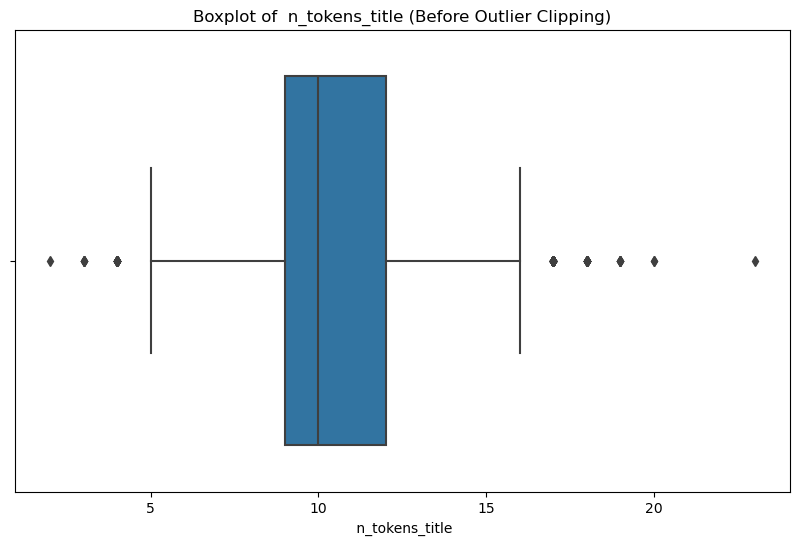

In [73]:
# 7. Handle Outliers using IQR method# Visualize a sample feature before outlier handling
sample_feature = numerical_features[0]
plt.figure(figsize=(10, 6))
sns.boxplot(x=features_raw[sample_feature])
plt.title(f'Boxplot of {sample_feature} (Before Outlier Clipping)')
plt.show()

In [75]:
# Apply IQR-based clipping
Q1 = features_raw.quantile(0.25)
Q3 = features_raw.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
features_raw = features_raw.clip(lower=lower_bound, upper=upper_bound, axis=1)

C:\Users\joelj\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


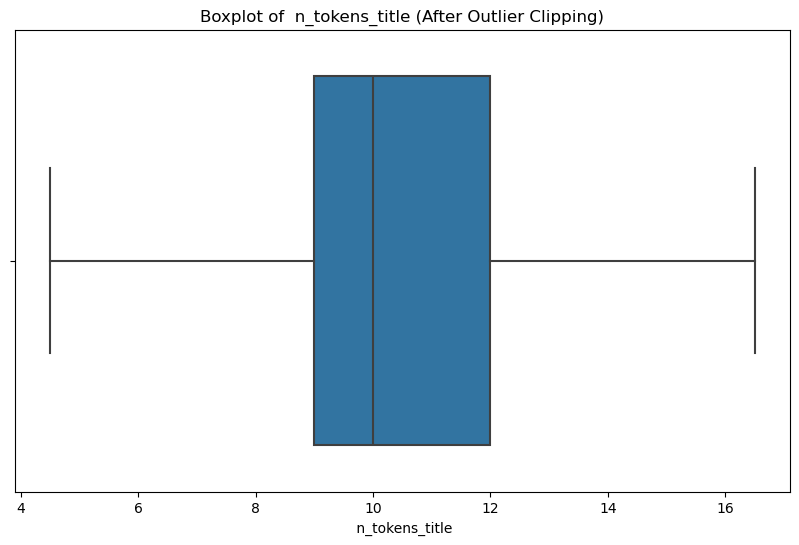

In [77]:
# Visualize the same sample feature after outlier handling
plt.figure(figsize=(10, 6))
sns.boxplot(x=features_raw[sample_feature])
plt.title(f'Boxplot of {sample_feature} (After Outlier Clipping)')
plt.show()

In [79]:
# 8. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    features_raw, popular_label, test_size=0.15, random_state=0
)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (33697, 58)
Testing set size: (5947, 58)


ValueError: Input X contains infinity or a value too large for dtype('float64').